### Tag and Genre Exploration
Goal: find top 10 tags that matter to define artists

In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv('artists.csv')

/var/folders/vh/hr9y9xbx3tv6jypl81p3lxk80000gn/T/ipykernel_55354/4081141395.py:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('artists.csv')


In [99]:
# Extract all tags from the tags_mb column and count occurrences
from collections import Counter

all_tags = []
for tags_str in df["tags_mb"].dropna():
    # Split the tags string by semicolon and strip whitespace
    tags = [tag.strip() for tag in tags_str.split(';')]
    all_tags.extend(tags)

# Count tag occurrences
tag_counts = Counter(all_tags)
# Convert the Counter to a DataFrame
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
tag_counts_df = tag_counts_df.sort_values('count', ascending=False).reset_index(drop=True)
# remove tags with count < 500
tag_counts_df = tag_counts_df[tag_counts_df['count'] >= 500]
# make all tags that contain "rock" to be "rock"
tag_counts_df["tag"] = tag_counts_df["tag"].apply(lambda x: "rock" if "rock" in str(x) else str(x))
# combine row of all tags that are "rock" and their count
rock_count = tag_counts_df[tag_counts_df["tag"] == "rock"]["count"].sum()
tag_counts_df = tag_counts_df[tag_counts_df["tag"] != "rock"]
tag_counts_df = pd.concat([tag_counts_df, pd.DataFrame({"tag": ["rock"], "count": [rock_count]})], ignore_index=True)

# remove musician, cmoposer, usa, england, british, latvian, likedis auto, uk
to_remove = ["musician", "composer", "usa", "england", "british", "latvian", "likedis auto", "uk", "music", "japanese", "german", "french", "american", "english", "latin", "production music"]
tag_counts_df["tag"] = tag_counts_df["tag"].apply(lambda x: None if str(x) in to_remove else str(x))
# Count the number of None values in the tag column
none_count = tag_counts_df["tag"].isna().sum()
print(f"Number of None values in tag column: {none_count}")

# remove None values
tag_counts_df = tag_counts_df[tag_counts_df["tag"].notna()]

# Get unique tags and sort them by frequency (most common first)
unique_tags = sorted(tag_counts_df["tag"].keys())
most_common_tags = tag_counts_df.head(10)

print(f"Total number of unique tags: {len(unique_tags)}")
print("Top 10 most common tags:")
most_common_tags

Number of None values in tag column: 15
Total number of unique tags: 67
Top 10 most common tags:


,tag,count
0,jazz,14629
1,punk,7911
4,classical,4315
6,hip hop,4020
9,pop,3137
12,folk,2779
13,electronic,2667
17,metal,2149
18,soul,1756
20,alternative,1589


In [100]:
# most_common_tags
# Store tags that contain each of the most common tags and sum their counts
tag_containing_dict = {}
for tag in most_common_tags["tag"]:
    # look for tags that contain that tag
    containing_tags = tag_counts_df[tag_counts_df["tag"].str.contains(tag)]
    # Sum up the counts for all tags containing this tag
    total_count = containing_tags["count"].sum()
    print(f"Total count for tags containing '{tag}': {total_count}")
    tag_containing_dict[tag] = total_count

tag_containing_dict

Total count for tags containing 'jazz': 14629
Total count for tags containing 'punk': 8512
Total count for tags containing 'classical': 4315
Total count for tags containing 'hip hop': 4020
Total count for tags containing 'pop': 3137
Total count for tags containing 'folk': 2779
Total count for tags containing 'electronic': 3293
Total count for tags containing 'metal': 6320
Total count for tags containing 'soul': 1756
Total count for tags containing 'alternative': 1589


{'jazz': 14629,
 'punk': 8512,
 'classical': 4315,
 'hip hop': 4020,
 'pop': 3137,
 'folk': 2779,
 'electronic': 3293,
 'metal': 6320,
 'soul': 1756,
 'alternative': 1589}

In [101]:
df = pd.read_csv('artists.csv')
df

/var/folders/vh/hr9y9xbx3tv6jypl81p3lxk80000gn/T/ipykernel_55354/207865198.py:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('artists.csv')


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False
...,...,...,...,...,...,...,...,...,...,...
1466078,1eab523e-98ff-4083-aa34-8922740bc696,정은지,NaN,South Korea,South Korea,NaN,NaN,NaN,NaN,False
1466079,a18f0527-907e-42b0-8268-504966274581,남태현,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,False
1466080,20a57e37-24b5-4301-855b-35076580fb88,헤일로,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,False
1466081,83891a4d-1bf4-4abe-a483-5b3d9d614efa,서현진,NaN,South Korea,South Korea,NaN,NaN,NaN,NaN,False


In [102]:
# Create a new column 'tags' to store the most common tags found for each artist
df['tags'] = None

# Convert tags columns to string to avoid issues with NaN values
df['tags_mb'] = df['tags_mb'].astype(str)
df['tags_lastfm'] = df['tags_lastfm'].astype(str)

# Create a list of the most common tags
common_tags = most_common_tags["tag"].tolist()

In [103]:
# Function to find matching tags and return them as a list
def find_matching_tags(tags_mb, tags_lastfm, common_tags_list):
    matching_tags = []
    for tag in common_tags_list:
        if tag in tags_mb or tag in tags_lastfm:
            matching_tags.append(tag)
    return matching_tags if matching_tags else None

# Apply the function to create the new tags column
df['tags'] = df.apply(lambda row: find_matching_tags(row['tags_mb'], row['tags_lastfm'], common_tags), axis=1)

# Clean up tags_mb as before
df["tags_mb"] = df["tags_mb"].apply(lambda x: None if str(x) in to_remove else str(x))

# Display the first few rows to verify the new column
print("Sample of artists with their tags:")
print(df[['artist_mb', 'tags']].head(10))

Sample of artists with their tags:
               artist_mb                                           tags
0               Coldplay                 [pop, electronic, alternative]
1              Radiohead                 [pop, electronic, alternative]
2  Red Hot Chili Peppers                [punk, pop, metal, alternative]
3                Rihanna  [hip hop, pop, electronic, soul, alternative]
4                 Eminem                    [hip hop, pop, alternative]
5            The Killers                       [punk, pop, alternative]
6             Kanye West  [hip hop, pop, electronic, soul, alternative]
7                Nirvana                     [punk, metal, alternative]
8                   Muse          [pop, electronic, metal, alternative]
9                  Queen                      [pop, metal, alternative]


In [104]:
df.to_csv("artists_with_genres.csv", index=False)

------------------------------------------------------------------------------
### Scrobbles Exploration
Goal: find a cutoff for scrobbles to define "popular artists" data

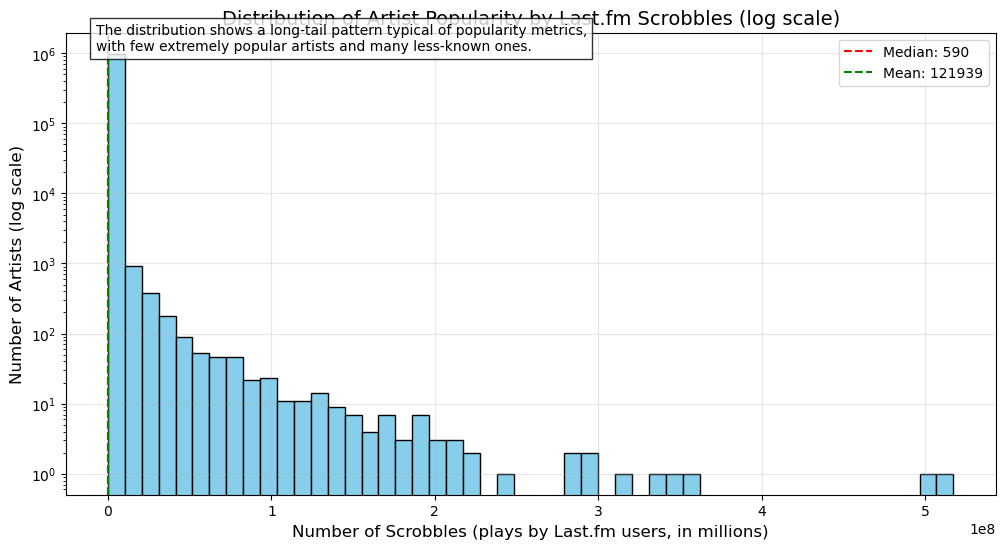

Detailed statistics of artist popularity (scrobbles on Last.fm):
count    9.867600e+05
mean     1.219395e+05
std      2.314559e+06
min      0.000000e+00
25%      4.600000e+01
50%      5.900000e+02
75%      6.028000e+03
max      5.171263e+08
Name: scrobbles_lastfm, dtype: float64

Additional insights:
Number of artists with >1M scrobbles: 14326
Number of artists with <100 scrobbles: 311273
Skewness: 76.77266020613814

Top 5 most popular artists by scrobbles:
         artist_mb  scrobbles_lastfm
17     The Beatles       517126254.0
1        Radiohead       499548797.0
0         Coldplay       360111850.0
8             Muse       344838631.0
23  Arctic Monkeys       332306552.0


In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of scrobbles_lastfm to visualize the distribution of artist popularity
plt.figure(figsize=(12, 6))
plt.hist(df["scrobbles_lastfm"].dropna(), bins=50, log=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Artist Popularity by Last.fm Scrobbles (log scale)', fontsize=14)
plt.xlabel('Number of Scrobbles (plays by Last.fm users, in millions)', fontsize=12)
plt.ylabel('Number of Artists (log scale)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some annotations to highlight the skewed distribution
median_scrobbles = df["scrobbles_lastfm"].median()
mean_scrobbles = df["scrobbles_lastfm"].mean()
plt.axvline(median_scrobbles, color='red', linestyle='--', label=f'Median: {median_scrobbles:.0f}')
plt.axvline(mean_scrobbles, color='green', linestyle='--', label=f'Mean: {mean_scrobbles:.0f}')
plt.legend()

# Add text explaining the distribution
plt.figtext(0.15, 0.85, "The distribution shows a long-tail pattern typical of popularity metrics,\n"
                        "with few extremely popular artists and many less-known ones.", 
            bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Calculate and display comprehensive statistics about artist popularity
print("Detailed statistics of artist popularity (scrobbles on Last.fm):")
stats = df["scrobbles_lastfm"].describe()
print(stats)

# Additional insights
print("\nAdditional insights:")
print(f"Number of artists with >1M scrobbles: {len(df[df['scrobbles_lastfm'] > 1000000])}")
print(f"Number of artists with <100 scrobbles: {len(df[df['scrobbles_lastfm'] < 100])}")
print(f"Skewness: {df['scrobbles_lastfm'].skew()}")  # Measure of distribution asymmetry

# Show top 5 most popular artists
print("\nTop 5 most popular artists by scrobbles:")
top_artists = df.sort_values('scrobbles_lastfm', ascending=False)[['artist_mb', 'scrobbles_lastfm']].head(5)
print(top_artists)

In [106]:
# Filter artists with more than 5 million scrobbles
popular_artists = df[df['scrobbles_lastfm'] > 50_000_000].sort_values('scrobbles_lastfm', ascending=False)
4
# Display the number of artists with more than 5 million scrobbles
print(f"Number of artists with more than 50 million scrobbles: {len(popular_artists)}")

# Show the top artists with more than 5 million scrobbles
print("\nTop artists with more than 50 million scrobbles:")
print(popular_artists[['artist_mb', 'scrobbles_lastfm']].sort_values('scrobbles_lastfm', ascending=True))

Number of artists with more than 50 million scrobbles: 297

Top artists with more than 50 million scrobbles:
                 artist_mb  scrobbles_lastfm
937               Mastodon        50230298.0
708        City and Colour        50364751.0
337  Johann Sebastian Bach        50370162.0
575                   Rush        50497090.0
472     Taking Back Sunday        50537271.0
..                     ...               ...
23          Arctic Monkeys       332306552.0
8                     Muse       344838631.0
0                 Coldplay       360111850.0
1                Radiohead       499548797.0
17             The Beatles       517126254.0

[297 rows x 2 columns]


------------------------------------------------------------------------------
### Normalizing 
Goal: find a cutoff for scrobbles to define "popular artists" data

In [116]:
songs = pd.read_csv('songs_with_predictions_small.csv')

In [118]:
col_names = songs.columns.tolist()
users =[]
for col in col_names:
    if "user" in col:
        users.append(col)

ratings = []
for user in users:
    ratings_for_user = songs[user]
    for rating in ratings_for_user:
        ratings.append(rating)

ratings = [i for i in ratings]


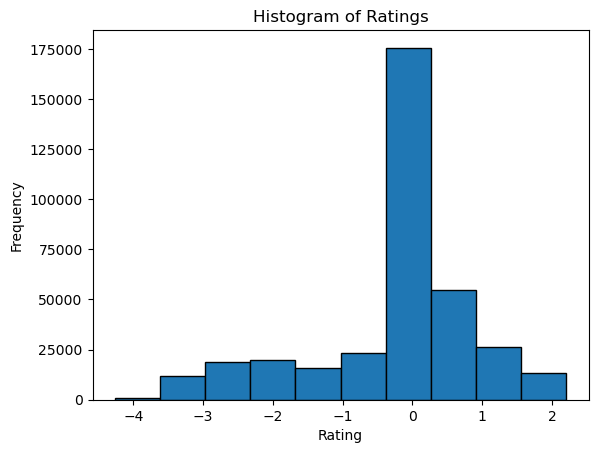

Mean rating: -0.2502241644827694
Median rating: 0.0
Standard deviation of ratings: 1.1265584925428205
Minimum rating: -4.262762151719238
Maximum rating: 2.200905449433086
Number of songs with rating = 0: 94500


In [119]:
# histogram of ratings
plt.hist(ratings, bins=10, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# print descriptive statistics of ratings
print(f"Mean rating: {np.mean(ratings)}")
print(f"Median rating: {np.median(ratings)}")
print(f"Standard deviation of ratings: {np.std(ratings)}")
print(f"Minimum rating: {np.min(ratings)}")
print(f"Maximum rating: {np.max(ratings)}")

# find number of songs with rating = 0
print(f"Number of songs with rating = 0: {len([r for r in ratings if r == 0])}")


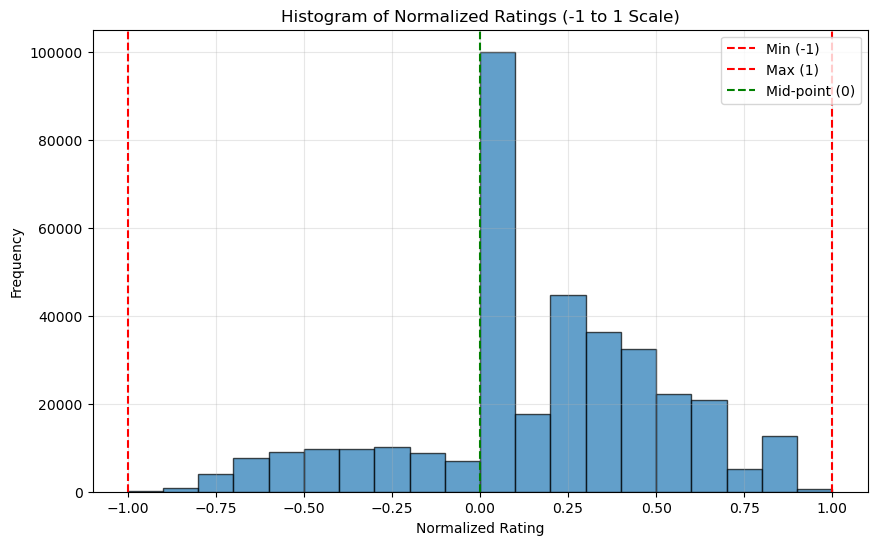

Mean of normalized ratings: 0.1578
Median of normalized ratings: 0.1904
Standard deviation of normalized ratings: 0.3581
Minimum of normalized ratings: -1.0000
Maximum of normalized ratings: 1.0000


In [120]:
# Normalize song ratings
# First, let's define our normalization function
def normalize_ratings(ratings, min_val, max_val):
    """
    Normalize ratings to be between -1 and 1 using min-max normalization
    """
    normalized = [0 if rating == 0 else (2 * (rating - min_val) / (max_val - min_val)) - 1 for rating in ratings]
    return normalized

# Get the statistics from our data
min_rating = min(ratings)
max_rating = max(ratings)

# Normalize the ratings to be between -1 and 1
normalized_ratings = normalize_ratings(ratings, min_rating, max_rating)

# Create a histogram of normalized ratings
plt.figure(figsize=(10, 6))
plt.hist(normalized_ratings, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Normalized Ratings (-1 to 1 Scale)')
plt.xlabel('Normalized Rating')
plt.ylabel('Frequency')
plt.axvline(x=-1, color='red', linestyle='--', label='Min (-1)')
plt.axvline(x=1, color='red', linestyle='--', label='Max (1)')
plt.axvline(x=0, color='green', linestyle='--', label='Mid-point (0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print descriptive statistics of normalized ratings
print(f"Mean of normalized ratings: {np.mean(normalized_ratings):.4f}")
print(f"Median of normalized ratings: {np.median(normalized_ratings):.4f}")
print(f"Standard deviation of normalized ratings: {np.std(normalized_ratings):.4f}")
print(f"Minimum of normalized ratings: {np.min(normalized_ratings):.4f}")
print(f"Maximum of normalized ratings: {np.max(normalized_ratings):.4f}")


In [121]:
# find number of songs with normalized rating > 0.9
print(f"Number of songs with normalized rating > 0.9: {len([r for r in normalized_ratings if r > 0.9])}")

# find number of songs with normalized rating < -0.9
print(f"Number of songs with normalized rating < -0.9: {len([r for r in normalized_ratings if r < -0.9])}")

# find number of songs with normalized rating = 0
print(f"Number of songs with normalized rating = 0: {len([r for r in normalized_ratings if r == 0])}")

Number of songs with normalized rating > 0.9: 583
Number of songs with normalized rating < -0.9: 57
Number of songs with normalized rating = 0: 94500


In [122]:
# Normalize song ratings
def normalize_ratings(ratings, min_val, max_val):
    """
    Normalize ratings to be between -1 and 1 using min-max normalization
    """
    normalized = [(2 * (rating - min_val) / (max_val - min_val)) - 1 for rating in ratings]
    return normalized

# Get the statistics from our data
min_rating = min(ratings)
max_rating = max(ratings)

# Normalize the ratings to be between -1 and 1
for user in users:
    normalized_ratings = normalize_ratings(songs[user], min_rating, max_rating)
    songs[user] = normalized_ratings

In [123]:
songs.to_csv('songs_with_normalized_ratings.csv', index=False)